**Key Assumption of Naive Bayes Classifier is that the fatures must be Independent of each other**

In [504]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

In [505]:
data = pd.read_csv('breast_cancer_dataset.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [506]:
data['diagnosis'] = data['diagnosis'].replace({'M':0, 'B':1}) # converting the nominal features into numerical features

<Axes: >

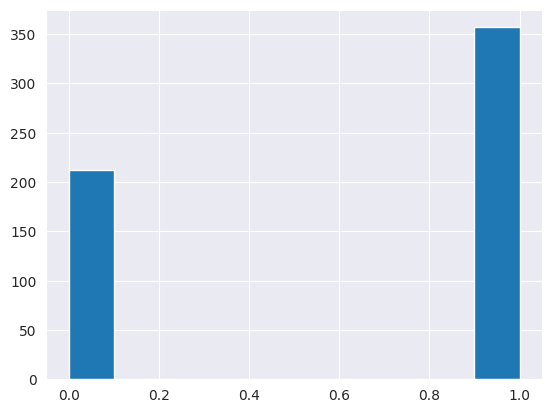

In [507]:
data["diagnosis"].hist() # histogram plot

In [508]:
data.drop(columns = ['id'],inplace=True)

In [509]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [510]:
df2 = data.iloc[:,:6]
df2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
0,0,17.99,10.38,122.80,1001.0,0.11840
1,0,20.57,17.77,132.90,1326.0,0.08474
2,0,19.69,21.25,130.00,1203.0,0.10960
3,0,11.42,20.38,77.58,386.1,0.14250
4,0,20.29,14.34,135.10,1297.0,0.10030


In [511]:
col1 = 'diagnosis'
col2 = 'smoothness_mean'
columns = df2.columns.tolist()

if col1 in columns and col2 in columns:
  i = columns.index(col1)
  j = columns.index(col2)
  columns[i], columns[j] = columns[j], columns[i]
  df2 = df2[columns]
df2.head()

,smoothness_mean,radius_mean,texture_mean,perimeter_mean,area_mean,diagnosis
0,0.11840,17.99,10.38,122.80,1001.0,0
1,0.08474,20.57,17.77,132.90,1326.0,0
2,0.10960,19.69,21.25,130.00,1203.0,0
3,0.14250,11.42,20.38,77.58,386.1,0
4,0.10030,20.29,14.34,135.10,1297.0,0


<Axes: >

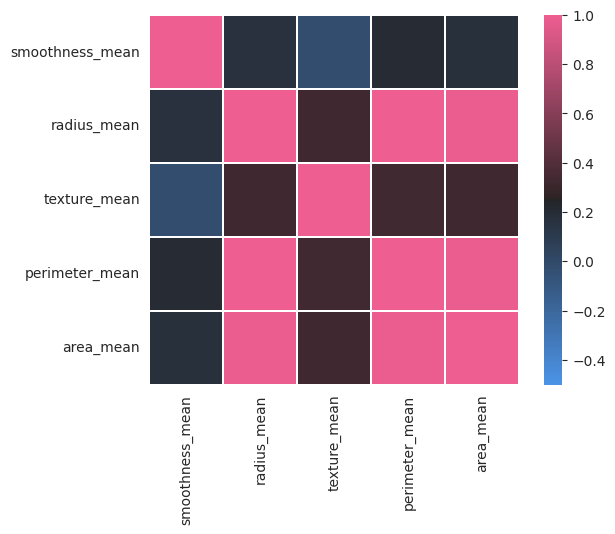

In [512]:
corr = df2.iloc[:,:-1].corr(method = 'pearson')
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap = True)
sns.heatmap(corr, vmax = 1,vmin = -0.5, cmap = cmap , square = True, linewidth = 0.2)

In [513]:
df2 = df2[['radius_mean','texture_mean','smoothness_mean']]
df = pd.concat([df2,data['diagnosis']],axis = 1)
df.head()

,radius_mean,texture_mean,smoothness_mean,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0


<Axes: xlabel='texture_mean', ylabel='Count'>

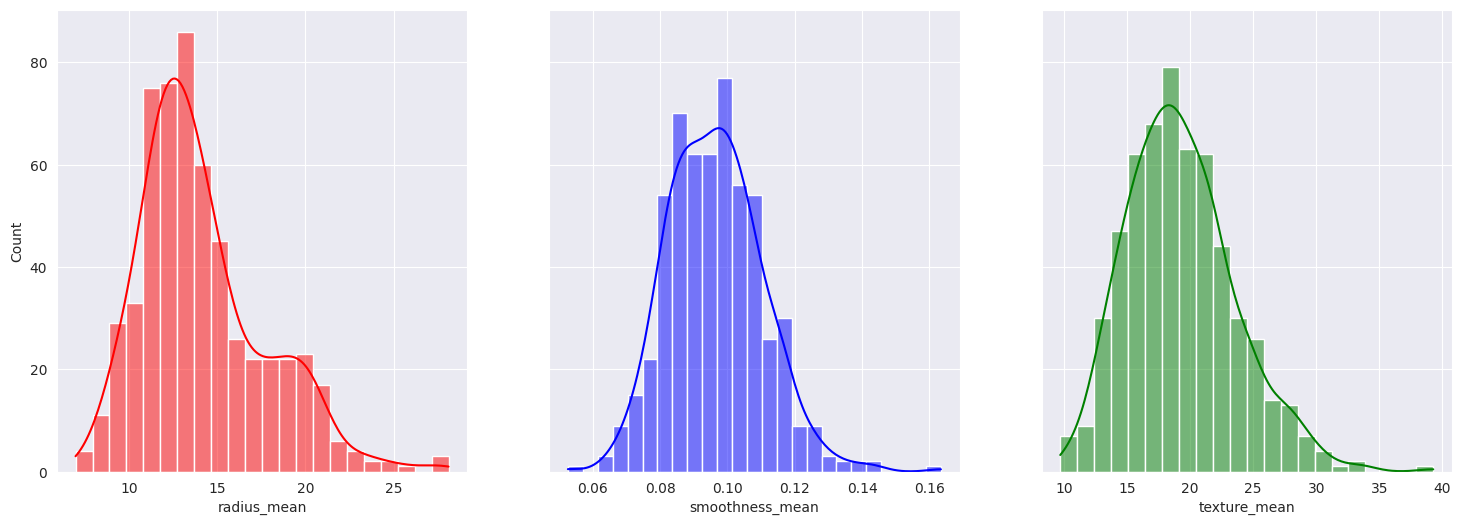

In [514]:
fig, axs = plt.subplots(1,3, figsize = (18,6),sharey = True)
sns.histplot(df,ax = axs[0], x = 'radius_mean',kde = True, color = 'r')
sns.histplot(df,ax = axs[1], x = 'smoothness_mean',kde = True, color = 'b')
sns.histplot(df,ax = axs[2], x = 'texture_mean',kde = True, color = 'g')

Calculate P(Y=y) for possible y

In [515]:
def cal_prior(df,Y):
  classes = sorted(list(df[Y].unique()))
  prior = []
  for i in classes:
    prior.append(len(df[df[Y] == i])/len(df))
  return prior

Approach 1: Calculate **P(X = x| Y = y)** using Gaussian Data

In [516]:
def claculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
  feat = list(df.columns)
  df = df[df[Y] == label]
  mean , std = df[feat_name].mean(), df[feat_name].std()
  p_x_given_y = (1/(np.sqrt(2*np.pi)*std))*np.exp(-((feat_val - mean)**2/(2*std**2)))
  return p_x_given_y

Calculate P(X = x1 | Y = y) P(X = x2 | Y= y) .....P(X = xn |Y = y) for all y and find the maximum

In [517]:
def naive_bayes_gaussian(df, X, Y):
    features = list(df.columns)[:-1]

    prior = cal_prior(df, Y)

    y_pred = []
    for x in X:
        labels = sorted(list(df[Y].unique()))
        post_prob = [0] * len(labels)  # Initialize posterior probabilities
        for j, label in enumerate(labels):
            likelihood = 1  # Initialize likelihood
            for k, feat in enumerate(features):
                likelihood *= claculate_likelihood_gaussian(df, feat, x[k], Y, label)
            post_prob[j] = likelihood * prior[j]
        y_pred.append(labels[np.argmax(post_prob)])  # Choose label with highest posterior probability
    return np.array(y_pred)


In [518]:
train,test = train_test_split(df ,test_size = 0.2, random_state = 41)

Confusion_matrix = <br>
[[TN  | FP] <br>
 [FN |  TP]] <br>
 The diagonal elements represent the number of correctly classified instances for each class.<br>
Off-diagonal elements represent misclassifications. <br>
Rows represent the actual classes, and columns represent the predicted classes.


In [519]:
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
y_pred = naive_bayes_gaussian(train, X = X_test, Y = "diagnosis")
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test,y_pred))

[[36  4]
 [ 0 74]]
0.9736842105263158


Validated it with the predifined library

In [520]:
X , y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gn = GaussianNB()
gn.fit(X_train,y_train)
y_pred = gn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test,y_pred))

[[39  4]
 [ 2 69]]
0.9583333333333334


In [521]:
# Discretizing the continuous features into categorical features
df['cat_mean_radius'] = pd.cut(df["radius_mean"].values, bins = 3, labels = [0,1,2])
df['cat_mean_texture'] = pd.cut(df["texture_mean"].values, bins = 3, labels = [0,1,2])
df['cat_mean_smoothness'] = pd.cut(df["smoothness_mean"].values, bins = 3, labels = [0,1,2])

df = df.drop(columns = ["radius_mean","texture_mean", "smoothness_mean"])
df = df[["cat_mean_radius", "cat_mean_texture", "cat_mean_smoothness", "diagnosis"]]
df.head(10)

,cat_mean_radius,cat_mean_texture,cat_mean_smoothness,diagnosis
0,1,0,1,0
1,1,0,0,0
2,1,1,1,0
3,0,1,2,0
4,1,0,1,0
5,0,0,2,0
6,1,1,1,0
7,0,1,1,0
8,0,1,2,0
9,0,1,1,0


In [522]:
train,test = train_test_split(df ,test_size = 0.2, random_state = 41)

#Approach 2: Calculate P(X = x|Y = y) categorically

In [523]:
def claculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
  feat = list(df.columns)
  df = df[df[Y] == label]
  p_x_given_y = len(df[df[feat_name] == feat_val])/len(df)
  return p_x_given_y

In [524]:
def naive_bayes_categorical(df, X, Y):
    features = list(df.columns)[:-1]

    prior = cal_prior(df, Y)

    y_pred = []
    for x in X:
        labels = sorted(list(df[Y].unique()))
        post_prob = [0] * len(labels)  # Initialize posterior probabilities
        for j, label in enumerate(labels):
            likelihood = 1  # Initialize likelihood
            for k, feat in enumerate(features):
                likelihood *= claculate_likelihood_categorical(df, feat, x[k], Y, label)
            post_prob[j] = likelihood * prior[j]
        y_pred.append(labels[np.argmax(post_prob)])  # Choose label with highest posterior probability
    return np.array(y_pred)

In [525]:
X_test1 = test.iloc[:,:-1].values
y_test1 = test.iloc[:,-1].values
y_pred1 = naive_bayes_categorical(train, X = X_test1, Y = "diagnosis")
print(confusion_matrix(y_test1, y_pred1))
print(f1_score(y_test1, y_pred1))

[[38  2]
 [ 5 69]]
0.9517241379310345


In [526]:
X , y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
gn = GaussianNB()
gn.fit(X_train,y_train)
y_pred = gn.predict(X_test1)
print(confusion_matrix(y_test1, y_pred1))
print(f1_score(y_test1,y_pred1))

[[21 22]
 [22 49]]
0.6901408450704225


Laplace smoothing , while calculating the likelihood for categorical features , its common to use laplace smoothing to handle cases when a certain values of a feature didn't appear in the training data for a specific class <br>
The log-likelihood is used to sum the probabilities to avoid numerical underflow.

In [527]:
def claculate_likelihood_categorical(df, feat_name, feat_val, Y, label, alpha=1):
    df_class = df[df[Y] == label]
    num_classes = len(df[Y].unique())

    # Laplace smoothing
    numerator = len(df_class[df_class[feat_name] == feat_val]) + alpha
    denominator = len(df_class) + alpha * num_classes

    p_x_given_y = numerator / denominator
    return p_x_given_y

def naive_bayes_categorical(df, X, Y):
    features = list(df.columns)[:-1]
    prior = cal_prior(df, Y)
    y_pred = []
    for x in X:
        labels = sorted(df[Y].unique())
        log_likelihood = []  # Using log likelihood
        for j in range(len(labels)):
            log_likelihood.append(np.log(prior[j]))  # Initialize with prior probabilities
            for i, feat_val in enumerate(x):
                log_likelihood[j] += np.log(claculate_likelihood_categorical(df, features[i], feat_val, Y, labels[j]))
        y_pred.append(labels[np.argmax(log_likelihood)])
    return np.array(y_pred)

X_test1 = test.iloc[:, :-1].values
y_test1 = test.iloc[:, -1].values
y_pred1 = naive_bayes_categorical(train, X=X_test1, Y="diagnosis")
print(confusion_matrix(y_test1, y_pred1))
print(f1_score(y_test1, y_pred1))


[[38  2]
 [ 5 69]]
0.9517241379310345


##Applying Naive Bayes on Play tennis dataset

In [528]:
df1 = pd.read_csv('play_tennis.csv')
df1

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [529]:
df1['play'].value_counts()

Yes    9
No     5
Name: play, dtype: int64

In [530]:
py = 9/14
pn = 5/14
print(py)
print(pn)

0.6428571428571429
0.35714285714285715


In [531]:
pd.crosstab(df1['outlook'],df1['play'])

play,No,Yes
outlook,,
Overcast,0,4
Rain,2,3
Sunny,3,2


In [532]:
p_ov_yes = 4/9
p_r_yes = 3/9
p_s_yes = 2/9

p_ov_no = 0
p_r_no = 2/5
p_s_no = 3/5

In [533]:
pd.crosstab(df1['temp'],df1['play'])

play,No,Yes
temp,,
Cool,1,3
Hot,2,2
Mild,2,4


In [534]:
p_cool_yes = 3/9
p_hot_yes = 2/9
p_mild_yes = 4/9

p_cool_no = 1/5
p_hot_no = 2/5
p_mild_no = 2/5

In [535]:
pd.crosstab(df1['wind'],df1['play'])

play,No,Yes
wind,,
Strong,3,3
Weak,2,6


In [536]:
p_strong_yes = 3/9
p_weak_yes = 6/9

p_strong_no = 3/5
p_weak_no = 2/5

In [537]:
pd.crosstab(df1['humidity'],df1['play'])

play,No,Yes
humidity,,
High,4,3
Normal,1,6


In [538]:
p_high_yes = 3/9
p_normal_yes = 6/9

p_high_no = 4/5
p_normal_no = 1/5

In [539]:
pyes = py*p_s_yes*p_weak_yes*p_high_yes*p_hot_yes
pyes

0.007054673721340388

In [540]:
pno = pn*p_s_no*p_weak_no*p_high_no*p_hot_no
pno

0.02742857142857143